# Assignment: remotesensing

In this exercise please complete a land cover classification for a location you know well. 

**Few Important Things:**
 - Save this file as geo5_emailuser_attempt#_assignment (e.g. geo5_mmann1123_attempt0_remotesensing)
 - If you can't figure something out, that is ok, do your best and share it

## IMPORTANT 
Please submit your image files in a zipped folder called 'data' and make sure your .ipynb uses relative paths. So your image should be readable from `./data/my_rgbn.tif`. 

I will deduct points if this is not the case!


## Task A (5 points)

Please follow the examples provided in lectures 9 & 10 to download "analytical" imagery from [sentinel hub eobrowser](https://apps.sentinel-hub.com/).  

- Click the "i" button in the upper right corner and read through the tutorial

- Register for an account, and sign in

- Search for a place you know well. Like you home town. 
- Zoom in close enough so that you can see a few different land cover types (water, forest, fields etc)
    - Limit the extent of the image to about a 3-5 mile area
- In Search Tab
    - Check only `Sentinel 2` 
    - Click "advanced search"
    - Select only `L2A`
    - Slide "Max cloud cover" scroll bar to `< 5%`
    - Scroll down select a date range that includes a few month or a year
    - Click "Search"

- In Discover Tab
    - Scroll to find an image/date that has close to 0% cloud cover, with an image that fully covers your area.
    - Click visualize

- In Visualize Tab
    - Hit "True Color" and a few different band combination to see what they can tell you

- On the Map Frame
    - Click the Polygon called "Create an area of interest"
        - Hit the "box" option
        - Draw an area of interest around the area you want to download
    - Click the "Download Image" button
        - Hit the "Analytical" tab
            - Under "Image Format" choose `Tiff (16bit)`
            - Under "Image Resolution" select `medium`
            - Read https://en.wikipedia.org/wiki/Sentinel-2 to find the band number of `red`, `green`, `blue`, and `NIR` for sentinel 2. 
            - Choose a projection
            - Under "Visualize" uncheck everything (nothing should be selected)
            - Under "Raw" select the bands for  `red`, `green`, `blue`, and `NIR`.
            - Select "Download" 
            - Rename the file `my_rgbn.tif`.

To keep the image sizes small please make sure your download fills these criteria: 
- the bands `red`, `green`, `blue`, and `near-IR` only. 
- download `analytical` imagery under the tab under that name
- set `image resolution` to `medium`
- set `image format` to TIFF `16-bit`
- save the file in a folder called `data`, and call the image `my_rgbn.tif`


For this sub-task pleas fill out the [markdown table](https://markdown.land/markdown-table) below indicating all the relevant information for the bands you download. 

Make sure to include the sensor name (sentinel vs landsat etc) - **please fill out the table below**


| Sentinel 2 Band # | Band in my image   |  Description   |  
|-------------------|--------------------| --------| 
| Band 2            | Band 1             |  Blue   |  
| Band 3            | Band 2             |  Green  |


| Sentinel 2 Band # | Band in my image   |  Description   |  
|-------------------|--------------------| --------| 
| Band 4            | Band 3             |  Red    |  
| Band 8            | Band 4             |  NIR    |
     

For this sub-task please use `geowombat` to:

- Open your image `./data/my_rgbn.tif` as `src`
- Set the names properly, and must include `red`, `green`, `blue`, and `nir`
- Create a variables:
    - `transform`: holding the transform for your image as it is stored in the src attributes (tuple)
    - `res`: holding the resolution for x and y in a tuple
    - `crs`: the EPSG code as an integer

In [6]:
import geowombat as gw
import geopandas as gpd
import pandas as pd
import os
from glob import glob

os.chdir('/Users/maryanashnitser/Desktop')

band_dir = './data/my_rgbn'
files = sorted(glob(os.path.join(band_dir, '*.tiff'))) 
band_names = ['blue', 'green', 'red', 'nir']

with gw.open(
    filename=files,
    stack_dim='band',
    band_names=band_names,
    chunks=16
) as src:
    rgbn = src.sel(band=["red", "green", "blue", "nir"])
    os.makedirs('./data', exist_ok=True)
    gw.save(data=rgbn, filename='my_rgbn.tif', overwrite=True)

transform = tuple(src.attrs["transform"])

image = 'my_rgbn.tif'

res = (transform[0], abs(transform[4])) 

crs = src.attrs['crs']



IndexError: list index out of range

In [ ]:
display(src)
print(transform)
print(res)
print(crs)

<xarray.DataArray (band: 4, y: 225, x: 435)> Size: 783kB
dask.array<concatenate, shape=(4, 225, 435), dtype=uint16, chunksize=(1, 16, 16), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 3kB 3.195e+05 3.195e+05 ... 3.262e+05 3.262e+05
  * y        (y) float64 2kB 4.309e+06 4.309e+06 ... 4.305e+06 4.305e+06
  * band     (band) <U5 80B 'blue' 'green' 'red' 'nir'
Attributes: (12/16)
    transform:               (15.6110276252873, 0.0, 319460.225839, 0.0, -14....
    crs:                     32618
    res:                     (15.6110276252873, 14.877507320000893)
    is_tiled:                0
    nodatavals:              (nan,)
    _FillValue:              nan
    ...                      ...
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _data_are_separate:      1
    _data_are_stacked:       1

(15.6110276252873, 0.0, 319460.225839, 0.0, -14.877507320000893, 4308622.594439)
(15.6110276252873, 14.877507320000893)
32618


In [ ]:
"""Run the following hidden tests: you should get no errors"""
from xarray.core.dataarray import DataArray
try:
    assert isinstance(src, DataArray)
except AssertionError:
    raise TypeError("src must be of type xarray DataArray the geowombat default")

names = ['red', 'green', 'blue', 'nir']
 
try:
    assert set(list(src.band.values)).issubset(names)
except AssertionError:
    raise TypeError("band names must include 'red', 'green', 'blue', 'nir' in any order (as needed for your image)")

try:
    assert isinstance(transform, tuple)
except AssertionError:
    raise TypeError("transform must be of type tuple, check src attributes")
try:
    assert isinstance(res, tuple)
except AssertionError:
    raise TypeError("res must be of type tuple, check src attributes")    
try:
    assert isinstance(crs, int)
except AssertionError:
    raise TypeError("crs must be of type int, check src attributes")   

In [ ]:
"""Hidden tests are below"""

'Hidden tests are below'

In [ ]:
"""Hidden tests are below"""

'Hidden tests are below'

In [ ]:
"""Hidden tests are below"""

'Hidden tests are below'

## Task B (2 points)

Plot your image as true color (RGB) - you might need to select the proper bands, or reorder them, depending on your image.

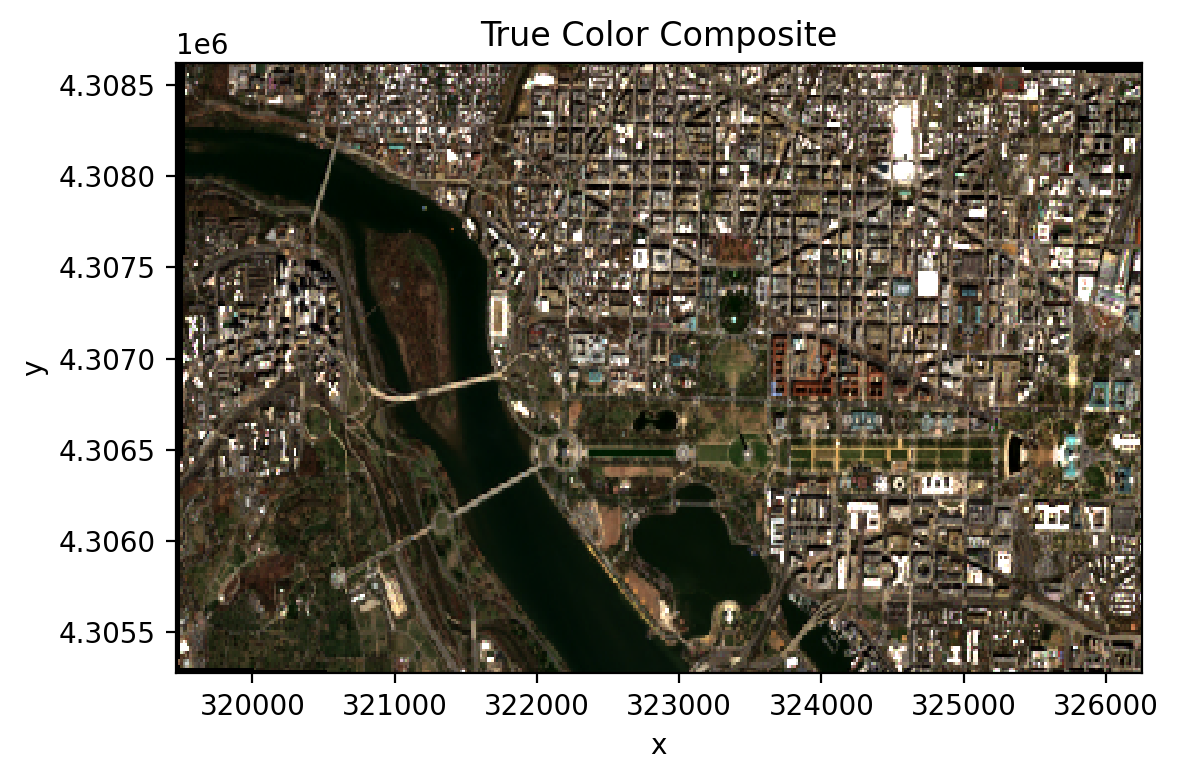

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# plot all three
with gw.open(files, stack_dim='band', band_names=band_names) as src:
    rgb = src.sel(band=['red', 'green', 'blue'])

    fig, ax = plt.subplots(dpi=200, figsize=(6, 4))
    rgb.plot.imshow(robust=True, ax=ax)
    ax.set_title("True Color Composite")
    plt.tight_layout()
    plt.show()

## Task C (5 points)

Use geowombat to calcuate a vegetation index. 

Create the following:
- A new geowombat band called `evi` which holds the enhanced vegetation index (not evi2)
- The `evi.values` range should be greater than 0 and less than 1
- Plot out `evi`


In [ ]:
import numpy as np

with gw.open(files, stack_dim='band', band_names=band_names) as src:
    print(src)
    evi = src.gw.evi(sensor='src', scale_factor=0.0001)
    print(evi)

<xarray.DataArray (band: 4, y: 225, x: 435)> Size: 783kB
dask.array<concatenate, shape=(4, 225, 435), dtype=uint16, chunksize=(1, 9, 435), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 3kB 3.195e+05 3.195e+05 ... 3.262e+05 3.262e+05
  * y        (y) float64 2kB 4.309e+06 4.309e+06 ... 4.305e+06 4.305e+06
  * band     (band) <U5 80B 'blue' 'green' 'red' 'nir'
Attributes: (12/16)
    transform:               (15.6110276252873, 0.0, 319460.225839, 0.0, -14....
    crs:                     32618
    res:                     (15.6110276252873, 14.877507320000893)
    is_tiled:                0
    nodatavals:              (nan,)
    _FillValue:              nan
    ...                      ...
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _data_are_separate:      1
    _data_are_stacked:       1
<xarray.DataArray (band: 1, y: 225, x: 435)> Size: 783kB
dask.array<where, shape=(1, 

In [ ]:
display(evi)
print(np.max(evi.values), np.min(evi.values))

<xarray.DataArray (band: 1, y: 225, x: 435)> Size: 783kB
dask.array<where, shape=(1, 225, 435), dtype=float64, chunksize=(1, 9, 435), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 3kB 3.195e+05 3.195e+05 ... 3.262e+05 3.262e+05
  * y        (y) float64 2kB 4.309e+06 4.309e+06 ... 4.305e+06 4.305e+06
  * band     (band) <U3 12B 'evi'
Attributes: (12/20)
    transform:               (15.6110276252873, 0.0, 319460.225839, 0.0, -14....
    crs:                     32618
    res:                     (15.6110276252873, 14.877507320000893)
    is_tiled:                0
    nodatavals:              (nan,)
    _FillValue:              nan
    ...                      ...
    _data_are_separate:      1
    _data_are_stacked:       1
    pre-scaling:             0.0001
    sensor:                  src
    vi:                      evi
    drange:                  (0, 1)

1.0 0.0


In [ ]:
"""Run the following tests: you should get no errors"""
from xarray.core.dataarray import DataArray
try:
    assert isinstance(evi, DataArray)
except AssertionError:
    raise TypeError("evi must be of type xarray DataArray the geowombat default")
try:
    assert list(evi.band.values) == ['evi']
except AssertionError:
    raise TypeError("the only band name should be evi")


import numpy as np
print(np.nanmax(evi.values), np.nanmin(evi.values))
try:
    assert np.nanmax(evi.values) <= 1
except AssertionError:
    raise TypeError("evi must have a max value of 1, see scale_factor")
try:
    assert np.nanmin(evi.values) >= 0
except AssertionError:
    raise TypeError("evi must have a min value of 0, see scale_factor")

1.0 0.0


In [ ]:
"""Hidden Tests"""

'Hidden Tests'

In [ ]:
"""Hidden Tests"""

'Hidden Tests'

**Challange** 

Use `xarray`s function `concat` to add `evi` as a fifth band in `src`. Concatenation should happen on the dimension `dim='band'` 



In [ ]:
'''
import xarray as xr
# YOUR CODE HERE
raise NotImplementedError()
'''

'\nimport xarray as xr\n# YOUR CODE HERE\nraise NotImplementedError()\n'

`src` should now have 5 bands, with the last one called `evi`

In [ ]:
#display(src)

In [ ]:
"""Run the following tests: you should get no errors"""
'''
from xarray.core.dataarray import DataArray
try:
    assert len(src.band) == 5
except AssertionError:
    raise TypeError("you should now have 5 bands")

names = ['red', 'green', 'blue', 'nir','evi']
 
try:
    assert set(list(src.band.values)).issubset(names)
except AssertionError:
    raise TypeError("band names must include 'red', 'green', 'blue', 'nir', and 'evi' in any order (as needed for your image)")

'''

'\nfrom xarray.core.dataarray import DataArray\ntry:\n    assert len(src.band) == 5\nexcept AssertionError:\n    raise TypeError("you should now have 5 bands")\n\nnames = [\'red\', \'green\', \'blue\', \'nir\',\'evi\']\n\ntry:\n    assert set(list(src.band.values)).issubset(names)\nexcept AssertionError:\n    raise TypeError("band names must include \'red\', \'green\', \'blue\', \'nir\', and \'evi\' in any order (as needed for your image)")\n\n'

In [ ]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

## Task C (5 points)

Following the example from lecture 10, create your own training dataset of :
- Create one empty shapefile in QGIS called `./data/training.shp`, 
    - with attribute columns `name` and `class`
        - where `name` will hold a text based name like `'forest'` and
        - `class` holds an uniquely indentifying integer associated with each land class like `1` for all `forest` values.
- Add it to the map
- Turn on editing
- Add new `points`        
- Create at least 20 points for each identified land cover type (water, forest, urban, etc)
    - Assign the correct `name` and `class` values as you create them in QGIS. 
- For at least 3 land cover classes

Note: Training data should be `points` *not polygons*, 



### Part 1
For this sub-task please:
- Fill out the following [markdown table](https://markdown.land/markdown-table) with your land cover codes and the land classes associated with them


| name | class   |  
|-----------------|--------| 
| Vegetation          | 1      |  
| Urban         | 2      | 
| Water         | 3      | 

### Part 2
Read in your training data into a variable called `train` from `./data/training.shp` here

In [ ]:
import geopandas as gpd

# YOUR CODE HERE

train = gpd.read_file('/Users/maryanashnitser/Desktop/data/my_rgbn/:data:training.shp')
train = train.drop('id', axis=1)

In [ ]:
len(train)

NameError: name 'train' is not defined

In [ ]:
"""Run the following tests: you should get no errors"""
from geopandas.geodataframe import GeoDataFrame
try:
    assert isinstance(train, GeoDataFrame)
except AssertionError:
    raise TypeError("train must be a geodataframe")

names = ['name', 'class','geometry']
 
try:
    assert set(train.columns).issubset(names)
except AssertionError:
    raise TypeError("You must have columns 'name', 'class', and 'geometry' and nothing else")

from geopandas.geodataframe import GeoDataFrame
try:
    assert isinstance(train, GeoDataFrame)
except AssertionError:
    raise TypeError("train must be a geodataframe")

names = ['name', 'class','geometry']
 
try:
    assert set(train.columns).issubset(names)
except AssertionError:
    raise TypeError("You must have columns 'name', 'class', and 'geometry' and nothing else")

try:
    assert len(train) >= 60
except AssertionError:
    raise TypeError("You don't have enough points generated, at least 20 of three land cover classes")
try:
    assert len(pd.DataFrame({'count':train.groupby('class').size()})['count']) >= 3
except AssertionError:
    raise TypeError("You need to have at least three different class values (e.g. forest, water, developed")
try:
    assert all(pd.DataFrame({'count':train.groupby('class').size()})['count'] >= 20)
except AssertionError:
    raise TypeError("You need to have at least 20 points for each class")

 


In [ ]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

In [ ]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

In [ ]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

## Part 3 (2 points)

Use geowombat and seaborn to recreate the following:

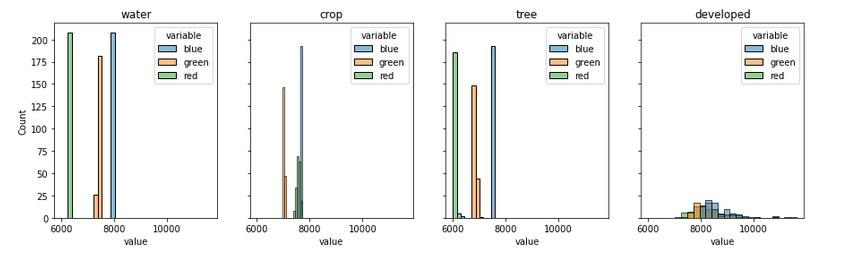

- Use geowombat `extract` function to collect band values for each class of data
- Create a histogram of the band values for each land class using seaborn [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

To do this you will need to use the function called [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html), to get the data into the format that `seaborn` prefers.

For example we will need to melt the following data:

``` python 
print(data)
```
```
          name  blue  green   red
      water  8017   7435  6283
      water  8016   7439  6294
       crop  7666   7000  7434
       tree  7558   6999  6178
  developed  8011   7946  7754
  developed  9217   9022  8762

```

so that is looks like this:

``` python 
data.melt(value_vars=['blue','green','red'])
```
```
   variable  value
0      blue   8017
1      blue   8016
2      blue   7666
3      blue   7558
4      blue   8011
5      blue   9217
6     green   7435
7     green   7439
8     green   7000
9     green   6999
10    green   7946
11    green   9022
12      red   6283
13      red   6294
14      red   7434
15      red   6178
16      red   7754
17      red   8762

```
Basically `melt` stacks our data vertically. `seaborn` can then use `variable` column to assign groups (hues) and the `value` column to plot the values. 


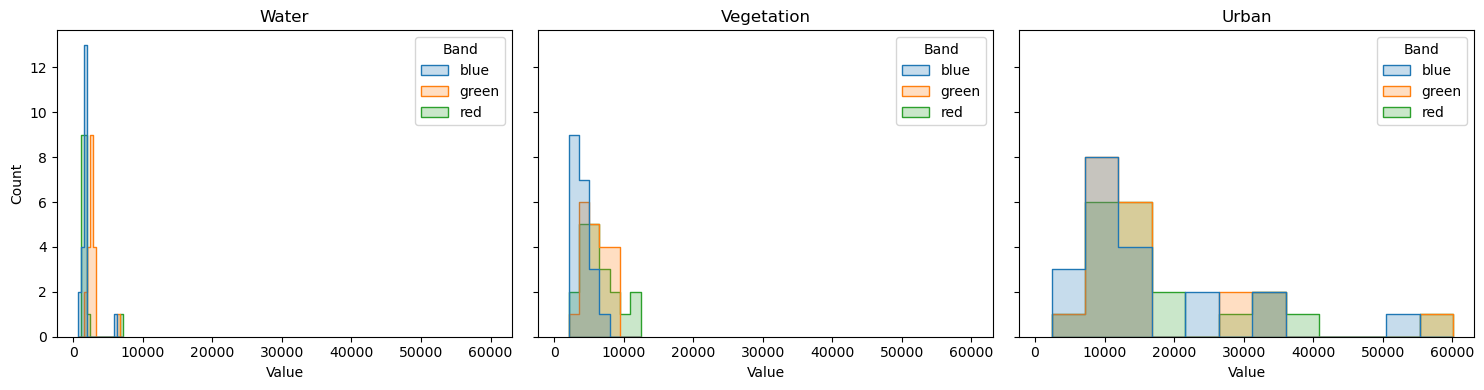

In [ ]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geowombat as gw

with gw.open(files, stack_dim='band', band_names=band_names) as src:
    data = gw.extract(src, train)

data = data.rename(columns={1: 'blue', 2: 'green', 3: 'red', 4: 'nir'})

#print(data.head())
#print(data.columns)

df_melted = data.melt(
    id_vars=['name', 'class'], 
    value_vars=['blue', 'green', 'red'],
    var_name='Band',
    value_name='Value'
)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(15, 4), sharey=True, sharex=True)
axes = [ax1, ax2, ax3]

class_names = df_melted["name"].unique()

for ax, name in zip(axes, class_names):
    subset = df_melted[df_melted["name"] == name]
    sns.histplot(
        data= subset,
        x="Value",
        hue="Band",
        element="step",
        stat="count",
        common_norm=False,
        ax=ax
    )
    ax.set_title(name)
    
plt.tight_layout()
plt.show()

## Part 4 (6 Points)

Use `geowombat` to train and predict a landcover map using [random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 

For this subtask:
- Set up a `pipeline` called `pipe` that creates a workflow with the following steps [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
     - Applies sklearns `PCA` to reduce the dimensionality of the data to `2` dimensions  [docs](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
     - Applies the `RandomForestClassifier` classifier [docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
     - to predict `y` a landcover raster classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from geowombat.ml import  fit_predict

!pip install numpy-groupies
from sklearn_xarray.preprocessing import Featurizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

# YOUR CODE HERE
# Use a data pipeline

'''
step with name and function 
runs iteratively in pipeline 
use fit porject function 
because can fit a model on an image and predict on an image you haven’t seen 
'''

band_dir = './data/my_rgbn'
files = sorted(glob(os.path.join(band_dir, '*.tiff'))) 
band_names = ['blue', 'green', 'red', 'nir']


pipe= Pipeline([ ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(n_estimators=100, 
                                               random_state=0))])

with gw.config.update(ref_res=10):  
    with gw.open(files, stack_dim='band', nodata=0) as src:
        
        y = fit_predict(src, pipe, train, col='class')


In [ ]:
display(y)
print(pipe)

<xarray.DataArray (band: 1, y: 334, x: 679)> Size: 2MB
dask.array<xarray-<this-array>, shape=(1, 334, 679), dtype=float64, chunksize=(1, 9, 435), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 5kB 3.195e+05 3.195e+05 ... 3.262e+05 3.262e+05
  * y        (y) float64 3kB 4.309e+06 4.309e+06 ... 4.305e+06 4.305e+06
    time     <U2 8B 't1'
    targ     (y, x) uint8 227kB dask.array<chunksize=(9, 435), meta=np.ndarray>
  * band     (band) <U4 16B 'targ'
Attributes: (12/16)
    transform:               (10.0, 0.0, 319460.225839, 0.0, -10.0, 4308622.5...
    crs:                     32618
    res:                     (10.0, 10.0)
    is_tiled:                1
    nodatavals:              (0,)
    _FillValue:              0
    ...                      ...
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _data_are_separate:      1
    _data_are_stacked:       1

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(random_state=0))])


In [ ]:
"""Run the following: you should get no errors"""
import numpy as np
from xarray.core.dataarray import DataArray
try:
    assert isinstance(y, DataArray)
except AssertionError:
    raise TypeError("y must be a xarray DataArray the geowombat default")
try:
    assert len(y.band)
except AssertionError:
    raise TypeError("y should only have one band")
    

try:
    assert set(np.unique(train['class'])).issubset(list(np.unique(y.values) ))
except AssertionError:
    raise TypeError("y should have the same classes as your train['column']")

In [ ]:
"""Run the following: you should get no errors"""

from sklearn.pipeline import Pipeline
 
try:
    assert isinstance(pipe, Pipeline)
except AssertionError:
    raise TypeError("pipe must be a sklearn Pipeline type")

try:
    assert len(pipe.steps) == 2
except AssertionError:
    raise TypeError("the pipeline should have 2 steps")

try:
    assert pipe.steps[0][1].n_components == 2
except AssertionError:
    raise TypeError("the first step, PCA should have 2 n_components")
from sklearn.ensemble import RandomForestClassifier
try:
    assert str(type(pipe.steps[1][1]) ) == "<class 'sklearn.ensemble._forest.RandomForestClassifier'>"
except AssertionError:
    raise TypeError("the second step should be of type RandomForestClassifier")

For this subtask:
- Plot out your classification

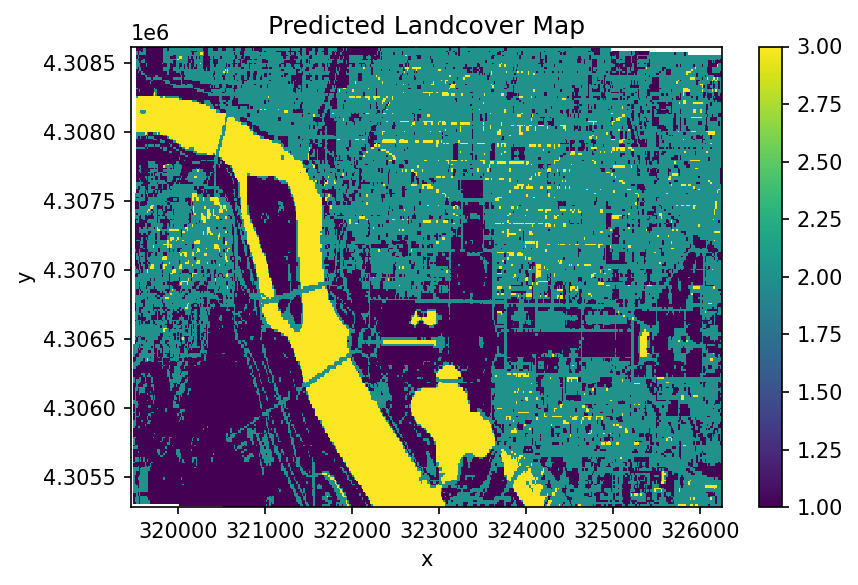

In [ ]:

# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
y.plot(robust=True, ax=ax, cmap='viridis')
plt.title("Predicted Landcover Map")
plt.tight_layout()

## IMPORANT

Please include a zipped folder that contains all the data you use here. !!!

In [ ]:
zipped = '.data/my_rgbn_maryanashnitser.zip'